# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

*Описание данных:*

Признаки:

 - `DateCrawled` — дата скачивания анкеты из базы
 - `VehicleType` — тип автомобильного кузова
 - `RegistrationYear` — год регистрации автомобиля
 - `Gearbox` — тип коробки передач
 - `Power` — мощность (л. с.)
 - `Model` — модель автомобиля
 - `Kilometer` — пробег (км)
 - `RegistrationMonth` — месяц регистрации автомобиля
 - `FuelType` — тип топлива
 - `Brand` — марка автомобиля
 - `NotRepaired` — была машина в ремонте или нет
 - `DateCreated` — дата создания анкеты
 - `NumberOfPictures` — количество фотографий автомобиля
 - `PostalCode` — почтовый индекс владельца анкеты (пользователя)
 - `LastSeen` — дата последней активности пользователя
 
Целевой признак:

 - `Price` — цена (евро)
 
 
 **Разработка пройдёт в три основных этапа:**

1. Загрузка и подготовка данных.
2. Обучение и проверка моделей.
3. Анализ моделей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Выявление--и-обработка-аномалий" data-toc-modified-id="Выявление--и-обработка-аномалий-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Выявление  и обработка аномалий</a></span></li><li><span><a href="#Разделение-и-кодирование-выборок" data-toc-modified-id="Разделение-и-кодирование-выборок-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Разделение и кодирование выборок</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

### Загрузка и обзор данных

Загрузим необходимые библиотеки и сделаем предварительные настройки.

In [1]:
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

import lightgbm as lgb
from catboost import CatBoostRegressor, cv, Pool

pd.options.display.float_format = '{:,.4f}'.format
import warnings
warnings.filterwarnings("ignore")

state = np.random.RandomState(32)

print('Setup complete')

Setup complete


Теперь загрузим и изучим данные.

In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('datasets/autos.csv')

In [3]:
def get_info(df):
    display(df.head(), df.info(), df.describe().T)
    print('Процент пропусков:\n', df.isna().mean().sort_values(ascending=False)*100)
    print()
    print('Кол-во дубликатов:', df.duplicated().sum())

In [4]:
get_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


None

,count,mean,std,min,25%,50%,75%,max
Price,"354,369.0000","4,416.6568","4,514.1585",0.0000,"1,050.0000","2,700.0000","6,400.0000","20,000.0000"
RegistrationYear,"354,369.0000","2,004.2344",90.2280,"1,000.0000","1,999.0000","2,003.0000","2,008.0000","9,999.0000"
Power,"354,369.0000",110.0943,189.8504,0.0000,69.0000,105.0000,143.0000,"20,000.0000"
Kilometer,"354,369.0000","128,211.1725","37,905.3415","5,000.0000","125,000.0000","150,000.0000","150,000.0000","150,000.0000"
RegistrationMonth,"354,369.0000",5.7146,3.7264,0.0000,3.0000,6.0000,9.0000,12.0000
NumberOfPictures,"354,369.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PostalCode,"354,369.0000","50,508.6891","25,783.0962","1,067.0000","30,165.0000","49,413.0000","71,083.0000","99,998.0000"


Процент пропусков:
 NotRepaired         20.0791
VehicleType         10.5794
FuelType             9.2827
Gearbox              5.5967
Model                5.5606
LastSeen             0.0000
PostalCode           0.0000
NumberOfPictures     0.0000
DateCreated          0.0000
Brand                0.0000
RegistrationMonth    0.0000
Kilometer            0.0000
Power                0.0000
RegistrationYear     0.0000
Price                0.0000
DateCrawled          0.0000
dtype: float64

Кол-во дубликатов: 4


Здесь сразу можем сделать следующие выводы по имеющимся данным:

 - Наименования столбцов приведём к змеиному регистру   
 - Удалим 4 дубликата 
 - `DateCrawled` — столбец будем удалять, так как признак не оказывает влияние на стоимоть.
 - `VehicleType` — имеется 10,5% пропусков, довольно трудно будет заполнить эти значения, но попробуем подобрать в зависимости от модели и марки.
 - `RegistrationYear` — сразу можно сказать, что имеются выбросы: минимальный год 1000, максимальный 9999.
 - `Gearbox` — имеется 5,5% процентов пропусков, их мы просто заменим на значение `no_info`.
 - `Power` — имеются нулевый значения, и аномально большие значения в 20 000.
 - `Model` — имеется 5,5% процентов пропусков. Попробуем подобрать значения, но возможно понадобиться удалить эту часть данных.
 - `RegistrationMonth` — столбец будем удалять, так как нам здесь важнее смотреть на год.
 - `FuelType` — имеется 9,3% пропусков, их мы просто заменим на значение `no_info`.
 - `NotRepaired` — имеется 20% пропусков, их мы просто заменим на значение `no_info`, так как подобрать значение здесь скорее всего будет не возможно
 - `DateCreated` — столбец будем удалять, так как признак не оказывает влияние на стоимоть.
 - `NumberOfPictures` — столбец имеет только нулевые значения, видимо по какой-то причине данные не собираются корректно, лучше его будет удалить.
 - `LastSeen` — столбец будем удалять, так как признак не оказывает влияние на стоимоть.
 - `PostalCode` - столбец будем удалять, так как признак не оказывает влияние на стоимоть.
 - `Price` - наш целевой признак и в нём имеются нулевые значения.

### Предобработка данных

Удалим лишние для нас столбцы

In [5]:
df_with_date = df.copy()
df = df.drop(["DateCrawled","DateCreated","LastSeen","NumberOfPictures","RegistrationMonth","PostalCode"],axis = 1)

Приведём столбцы к змеиному регистру.

In [6]:
correct_columns = []
for column in df.columns:
    snake_register = ''
    sep = '_'
    for i in column:
        if i.isupper():
            snake_register += sep + i.lower()
        else:
            snake_register += i
    correct_columns.append(snake_register.lstrip(sep))
df.columns = correct_columns
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Удалим дубликаты

In [7]:
df = df.drop_duplicates()
print('Кол-во дубликатов:', df.duplicated().sum())

Кол-во дубликатов: 0


#### Обработка пропусков

Здесь мы примем решение что для пропущеных значений будем подставлять новое, а не удалять строку целиком, так как это достаточно большой объём данных, более 20%.

Далее попробуем подобрать значения для пропусков в столбце `vehicle_type`. Посмотрим на значения данного столбца для модели `golf`

In [8]:
df.query('model == "golf"')['vehicle_type'].value_counts()

sedan          11146
small           3302
wagon           2652
convertible     1693
bus              698
coupe            406
other            180
suv               23
Name: vehicle_type, dtype: int64

Выглядит так, что подобрать более менее адекватные значения не получится, следовательно заменим пропущенные значения на `no_info` 

In [9]:
df['vehicle_type'] = df['vehicle_type'].fillna('no_info')

Теперь заменим пропуски в столбцах `not_repaired` `fuel_type` `gearbox` `model` тем же значением `no_info`

In [10]:
df['not_repaired'] = df['not_repaired'].fillna('no_info')
df['fuel_type'] = df['fuel_type'].fillna('no_info')
df['gearbox'] = df['gearbox'].fillna('no_info')
df['model'] = df['model'].fillna('no_info')

Посмотрим на процент пропусков ещё раз

In [11]:
print('Процент пропусков:\n', df.isna().mean().sort_values(ascending=False)*100)

Процент пропусков:
 not_repaired        0.0000
brand               0.0000
fuel_type           0.0000
kilometer           0.0000
model               0.0000
power               0.0000
gearbox             0.0000
registration_year   0.0000
vehicle_type        0.0000
price               0.0000
dtype: float64


#### Выявление  и обработка аномалий

Посмотрим на качество и адэкватность наших признаков.   
Разберём год регистрации автомобиля где у нас присутсвовали аномалии в минимальный год 1000 и максимальный 9999.

Посмотрим график распределения

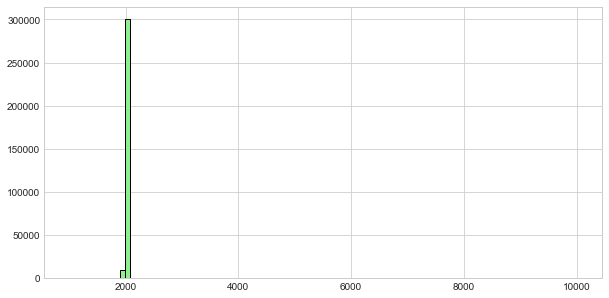

In [12]:
df['registration_year'].hist(figsize=(10,5), bins=100, color='lightgreen', ec='black');

Видно только то, что значения в основном расположены около 2000 года.   
Посмотрим ближе

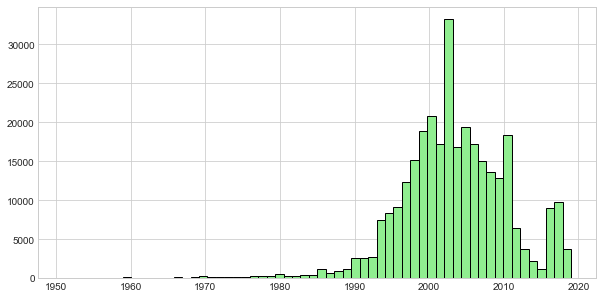

In [13]:
df.query('2025 > registration_year > 1950')['registration_year'].hist(figsize=(10,5), bins=60, color='lightgreen', ec='black');

Посмотрим на boxplot

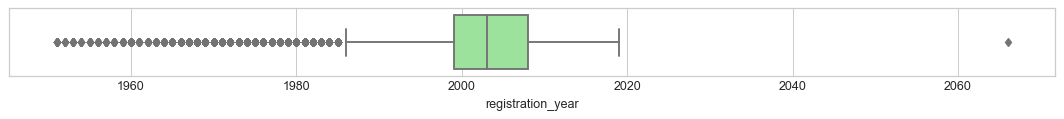

In [14]:
plt.figure(figsize=(15,1), dpi=90)
sns.boxplot(df.query('2100 > registration_year > 1950')['registration_year'], color='lightgreen');

Выделим 25% и 75% квантили, нижний порог должен находиться на $q25-1.5*(q75-q25)$, верхний $q75+1.5*(q75-q25)$

In [15]:
q25 = np.array(df['registration_year'].quantile(0.25))
q75 = np.array(df['registration_year'].quantile(0.75))
print('25% - ',q25, '75% - ', q75)
print('Нижний порог', q25-1.5*(q75-q25))
print('Верхний порог', q75+1.5*(q75-q25))

25% -  1999.0 75% -  2008.0
Нижний порог 1985.5
Верхний порог 2021.5


Выглядит более менне правдободно, посмотрим сколько это процентов от всего датасета

In [16]:
print(f'Доля аномальных значений года {(len(df.query("2021 < registration_year | 1985 > registration_year")) / len(df)):.1%}')

Доля аномальных значений года 1.7%


Не так много, лучше от них избавиться.

In [17]:
df_cleaned = df.query('2021 > registration_year > 1985')

Теперь посмотрим на мощность. Здесь у нас так же встречаются аномальные значения в 0 и 20000 л.с.   
Посмотрим на график. Автомобили мощьностью более 400 л.с. достоточно редки, поэтому отсечём график по этому значения.

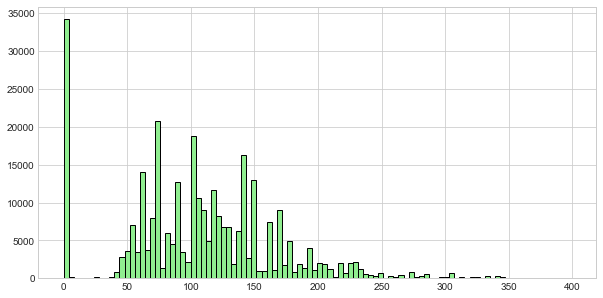

In [18]:
df_cleaned.query('power < 400')['power'].hist(bins=100, figsize=(10,5), color='lightgreen', ec='black');

Здесь так же видно большое кол-во нулевых значений.   
Посмотрим на пороги нормального распределения.

In [19]:
q25 = np.array(df_cleaned['power'].quantile(0.25))
q75 = np.array(df_cleaned['power'].quantile(0.75))
print('25% - ',q25, '75% - ', q75)
print('Нижний порог', q25-1.5*(q75-q25))
print('Верхний порог', q75+1.5*(q75-q25))

25% -  69.0 75% -  143.0
Нижний порог -42.0
Верхний порог 254.0


Посмотрим процент аномальных значений по кажому порогу

In [20]:
print(f'Доля аномальных значений мощности верхней границы {(len(df_cleaned.query("254 < power")) / len(df_cleaned)):.1%}')
print(f'Доля аномальных значений мощности нижней границы {(len(df_cleaned.query("42 > power")) / len(df_cleaned)):.1%}')

Доля аномальных значений мощности верхней границы 2.2%
Доля аномальных значений мощности нижней границы 11.7%


По верхней границе 2,2% можем удалить, по нижней границе 11,7% кажется большим. Посмотрим долю нулевых значений.

In [21]:
df_cleaned = df_cleaned.query('power < 249')
print(f'Доля нулевых значений мощности {(len(df_cleaned.query("0 == power")) / len(df)):.1%}')

Доля нулевых значений мощности 11.0%


Предположим, что нулевые значения просто не были заполнены пользователем, в таком случае мы можем поставить туда медианное значение мощности в зависимости от марки, модели, коробки передач и типа топлива. Если обучение моделей будет не удовлетворительным, вернёмся к удалению нулевых значений

In [22]:
df_cleaned.loc[df_cleaned['power'] == 0, 'power'] = np.nan

Заполним медианным значением и отбросим занчения мощности ниже 42 л.с.

In [23]:
df_cleaned['power'] = df_cleaned['power'].fillna(
    df_cleaned.groupby(['brand', 'model', 'fuel_type', 'gearbox'])['power'].transform('median'))
df_cleaned = df_cleaned.query('power > 42')

Посмотрим сколько осталось не заполненных медианой значений мощности

In [24]:
print(f'Доля нулевых значений мощности {((df_cleaned["power"].isna().sum()) / len(df_cleaned)):.1%}')

Доля нулевых значений мощности 0.0%


Теперь нам осталось разобраться с целевым признаком.   
В значениях цены были найдены нулевые значения, посмотрим подробнее какие цены мы имеем.

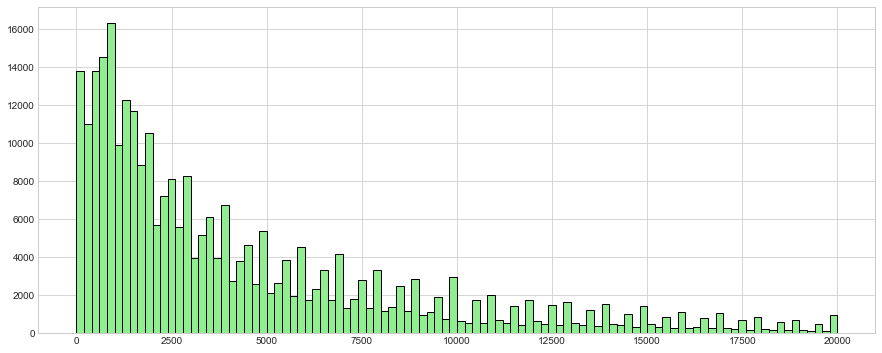

In [25]:
df_cleaned['price'].hist(figsize=(15,6), bins=100, color='lightgreen', ec='black');

Посмотрим поближе значения ближе 0

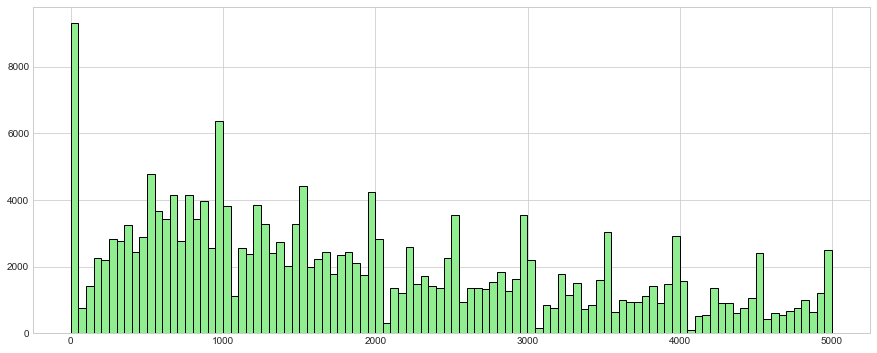

In [26]:
df_cleaned.query('price < 5000')['price'].hist(figsize=(15,6), bins=100, color='lightgreen', ec='black');

Распределени цен выглядит очень подозрительным. Много нулевых значений, и автомобилей с меньшей ценой явно больше, чем например со средней адекватной. Так же видна на графике кратность цен.   
Установим минимальную цену за поддержаный, возможно не на ходу, автомобиль 500 евро. Посмотрим сколько процентов будет удалено.

In [27]:
len(df_cleaned.query('price < 500'))
print(f'Доля автомобилей с ценой меньше 500 евро = {(len(df_cleaned.query("price < 500")) / len(df_cleaned)):.1%}')

Доля автомобилей с ценой меньше 500 евро = 10.3%


Удалим эти данные из нашего датасета

In [28]:
df_cleaned = df_cleaned.query('price > 500')

In [29]:
display(df_cleaned.head())
print('Удалено значений', df.shape[0] - df_cleaned.shape[0], 'или', round(100 - df_cleaned.shape[0] / df.shape[0]*100, 2), '% от изначального')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190.0000,no_info,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0000,grand,125000,gasoline,jeep,no_info
3,1500,small,2001,manual,75.0000,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0000,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102.0000,3er,150000,petrol,bmw,yes


Удалено значений 50537 или 16.34 % от изначального


Теперь можем считать данные очищенными.   
Перед разделением посмотрим на коррреляцию оставшихся признаков

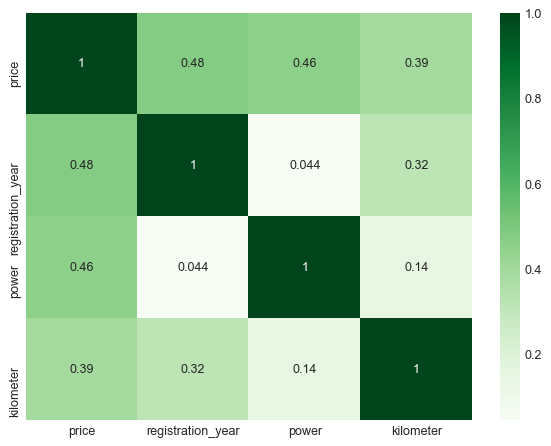

In [30]:
plt.figure(figsize=(8,6), dpi=90)
sns.heatmap(abs(df_cleaned.corr()), annot=True, cmap='Greens');

После очистки оставшиеся признаки коррелируют с целевым признаком.

In [31]:
df_cleaned.describe(include = 'all')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
count,"258,792.0000",258792,"258,792.0000",258792,"258,792.0000",258792,"258,792.0000",258792,258792,258792
unique,nan,9,nan,3,nan,248,nan,8,40,3
top,nan,sedan,nan,manual,nan,golf,nan,petrol,volkswagen,no
freq,nan,67088,nan,199300,nan,20259,nan,153922,54541,191332
mean,"4,881.9219",NaN,"2,004.1856",NaN,118.6536,NaN,"127,333.8048",NaN,NaN,NaN
std,"4,429.9965",NaN,6.2325,NaN,43.9694,NaN,"37,379.4263",NaN,NaN,NaN
min,501.0000,NaN,"1,986.0000",NaN,43.0000,NaN,"5,000.0000",NaN,NaN,NaN
25%,"1,500.0000",NaN,"2,000.0000",NaN,83.0000,NaN,"125,000.0000",NaN,NaN,NaN
50%,"3,250.0000",NaN,"2,004.0000",NaN,115.0000,NaN,"150,000.0000",NaN,NaN,NaN
75%,"6,900.0000",NaN,"2,008.0000",NaN,147.0000,NaN,"150,000.0000",NaN,NaN,NaN


#### Разделение и кодирование выборок

Для LightGBM нам нужно поменять формат данных для категориальных признаков на `category`

In [32]:
df_light = df_cleaned.copy()
df_light = df_light.astype({"vehicle_type":'category',
                                  "gearbox":'category',
                                  "model":'category',
                                  "fuel_type":'category',
                                  "brand":'category',
                                  "not_repaired":'category'})

In [33]:
df_light.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
1,18300,coupe,2011,manual,190.0000,no_info,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.0000,grand,125000,gasoline,jeep,no_info
3,1500,small,2001,manual,75.0000,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.0000,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102.0000,3er,150000,petrol,bmw,yes


Для моделей LinearRegression, ElasticNet и RandomForestRegressor потребуется кодирование признаков. Закодируем признаки методом OHE.

In [34]:
df_ohe = df_cleaned.copy()
df_ohe = pd.get_dummies(df_ohe)

In [35]:
df_ohe.head()

,price,registration_year,power,kilometer,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_no_info,vehicle_type_other,vehicle_type_sedan,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_no,not_repaired_no_info,not_repaired_yes
1,18300,2011,190.0000,125000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163.0000,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75.0000,150000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3600,2008,69.0000,90000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,650,1995,102.0000,150000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Разделим наши данные на выборки

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop('price', axis=1), df_cleaned['price'], test_size=0.20, random_state=state)

X_train_light, X_test_light, y_train_light, y_test_light = train_test_split(
    df_light.drop('price', axis=1), df_light['price'], test_size=0.20, random_state=state)   

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    df_ohe.drop('price', axis=1), df_ohe['price'], test_size=0.20, random_state=state)    

In [37]:
del df
del df_with_date
del df_light
del df_ohe
del df_cleaned

Данные подготовлены, переходим к обучению моделей

## Обучение моделей

Всего будем сравнивать 5 моделей:
1. LinearRegression
2. ElasticNet
3. SGDRegressor
4. RandomForestRegressor
5. CatBoostRegressor
6. LGBMRegressor

Для заказчика важны следующие параметры:
1. качество предсказания;
2. скорость предсказания;
3. время обучения

Результаты соберём в таблицу.

In [38]:
models = []
scores = []
prediction_time = []
training_time = []

### LinearRegression

Для линейных алгоритмов основанных на "расстоянии между признаками" понадобится масштабирование числовых признаков.

In [39]:
num_features = ['registration_year', 'power', 'kilometer']

In [40]:
scaler = StandardScaler()

X_train_ohe[num_features] = scaler.fit_transform(X_train_ohe[num_features])
X_test_ohe[num_features] = scaler.transform(X_test_ohe[num_features]) 

Создадим нашу метрику RMSE

In [41]:
def make_rmse(y, y_pred):
    rmse = mean_squared_error(y, y_pred)**0.5
    return rmse

rmse = make_scorer(make_rmse, greater_is_better=False)

Обучим CountVectorizer, который возможно поможет нам улучшить предсказания модели.

In [42]:
c_v = CountVectorizer(ngram_range=(1, 3), max_features=30000)

In [43]:
%%time
X_train_ohe.to_csv('train_text.txt', sep=' ', index=None, header=None)
X_test_ohe.to_csv('test_text.txt', sep=' ', index=None, header=None)

Wall time: 1min 10s


Сохраним признаки после модификации

In [44]:
%%time

with open('train_text.txt') as inp_train_file:
    X_train_ohe_cv = c_v.fit_transform(inp_train_file)
with open('test_text.txt') as inp_test_file:
    X_test_ohe_cv = c_v.transform(inp_test_file)

print(X_train_ohe_cv.shape, X_test_ohe_cv.shape)

(207033, 26682) (51759, 26682)
Wall time: 11 s


Подберём оптимальные параметры для нашей модели

In [45]:
lr_params = {'normalize': [True, False],
           'copy_X': [True, False],
           'fit_intercept': [True, False]}
lr_model = LinearRegression()
grid_lr = GridSearchCV(lr_model, lr_params, scoring=rmse, cv=5)

In [46]:
%%time
grid_lr.fit(X_train_ohe, y_train_ohe)

Wall time: 4min 22s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(make_rmse, greater_is_better=False),
             verbose=0)

In [47]:
grid_lr.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [48]:
lr_model = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)

Напишем функцию в которой обучим модель, предскажием значения на тестовой выборке и посмотрим на RMSE.

In [49]:
def get_results(model, X_train, X_test, y_train, y_test, CountVectorizer=False):
    '''
    The function train model, predict prices and returns name, times and RMSE score
    get_results(model, X_train, X_test, y_train, y_test, CountVectorizer=False)
    '''
    
    # Fitting
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
    
    # Predicting
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    score_rmse = make_rmse(y_test, y_pred)
    pred_time = end_time - start_time
    
    name = model.__class__.__name__
    
    if CountVectorizer == True:
        name = str(name) + ' + CountVectorizer'
    
    return print('RMSE на тестовой выборке' , round(score_rmse)), models.append(name), scores.append(score_rmse), prediction_time.append(pred_time), training_time.append(fit_time)
        

In [50]:
%%time
get_results(lr_model, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe)

RMSE на тестовой выборке 2365.0
Wall time: 8.23 s


(None, None, None, None, None)

Теперь посмотрим на результаты модели после изменения признаков

In [51]:
%%time
get_results(lr_model, X_train_ohe_cv, X_test_ohe_cv, y_train_ohe, y_test_ohe, CountVectorizer=True)

RMSE на тестовой выборке 2094.0
Wall time: 5.29 s


(None, None, None, None, None)

Результаты несколько лучше. Посмотрим на остальных моделях.

In [52]:
del column, correct_columns, get_info, grid_lr, lr_params, num_features, sep, snake_register

### ElasticNet

Подберём оптимальные параметры для нашей модели

In [53]:
en_params = {'normalize': [True, False],
           'copy_X': [True, False],
           'fit_intercept': [True, False],
            'l1_ratio': [.1, .5, .9],
            'selection': ['cyclic', 'random']}
en_model = ElasticNet(random_state=state)
grid_en = GridSearchCV(en_model, en_params, scoring=rmse, cv=5, n_jobs=3)

In [54]:
%%time
grid_en.fit(X_train_ohe, y_train_ohe)

Wall time: 6min 37s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=RandomState(MT19937) at 0x1A77D24F6A8,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(make_rmse, greater_is_better=False),
             verbose=0)

In [55]:
grid_en.best_estimator_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=RandomState(MT19937) at 0x1A707EB8BF8,
           selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
en_model = ElasticNet(l1_ratio=0.9, selection='random', random_state=state)

Обучим модель, предскажием значения на тестовой выборке и посмотрим на RMSE

In [57]:
%%time
get_results(en_model, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe, CountVectorizer=False)

RMSE на тестовой выборке 2674.0
Wall time: 3.1 s


(None, None, None, None, None)

Посмотрим результаты с CountVectorizer

In [58]:
%%time
get_results(en_model, X_train_ohe_cv, X_test_ohe_cv, y_train_ohe, y_test_ohe, CountVectorizer=True)

RMSE на тестовой выборке 3529.0
Wall time: 1min 29s


(None, None, None, None, None)

На модели ElasticNet с обработанными CountVectorizer признаками показала результаты даже хуже. Посмотрим на модель с градиентным спуском.

In [59]:
del en_params, grid_en

### SGDRegressor

Подберём оптимальные параметры для нашей модели

In [60]:
SGDRegressor().get_params

<bound method BaseEstimator.get_params of SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)>

In [61]:
SGDR_params = {'learning_rate': ['invscaling', 'adaptive'],
           'l1_ratio': [.1, .5, .9],
           'fit_intercept': [True, False]}
SGDR_model = SGDRegressor(random_state=state)
grid_SGDR = GridSearchCV(SGDR_model, SGDR_params, scoring=rmse, cv=5, n_jobs=-1)

In [62]:
%%time
grid_SGDR.fit(X_train_ohe, y_train_ohe)

Wall time: 5min 27s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25,
                                    random_state=RandomState(MT19937) at 0x1A77D24F6A8,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'learning_rate': ['invscal

In [63]:
grid_SGDR.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.1,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=RandomState(MT19937) at 0x1A707EB8D08, shuffle=True,
             tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
SGDR_model = SGDRegressor(learning_rate='adaptive', l1_ratio=0.1)

Обучим модель, предскажием значения на тестовой выборке и посмотрим на RMSE

In [65]:
%%time
get_results(SGDR_model, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe, CountVectorizer=False)

RMSE на тестовой выборке 2366.0
Wall time: 12.5 s


(None, None, None, None, None)

Посмотрим результаты с CountVectorizer

In [66]:
%%time
get_results(SGDR_model, X_train_ohe_cv, X_test_ohe_cv, y_train_ohe, y_test_ohe, CountVectorizer=True)

RMSE на тестовой выборке 2046.0
Wall time: 3.69 s


(None, None, None, None, None)

Здесь мы видим так же улучшение нашей метрики после преобразования признаков.

In [67]:
del SGDR_params, grid_SGDR, X_train_ohe_cv, X_test_ohe_cv

### RandomForestRegressor

Подберём оптимальные параметры для нашей модели

In [68]:
RandomForestRegressor().get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [69]:
# Перебор параметров занимал очень много времени, по-этому этот шаг здесь пропущен.
# Параметры были подобраны в ручную.
# %%time

# rf_params = {'max_depth': range(7,25,2),
#            'n_estimators': range(50,110,10)}
# rf_model = RandomForestRegressor(random_state=state)
# grid_rf = GridSearchCV(rf_model, rf_params, scoring=rmse, cv=5 n_jobs=-1)

# grid_rf.fit(X_train_ohe, y_train_ohe)
# grid_rf.best_estimator_

In [70]:
rf_model = RandomForestRegressor(random_state=state, max_depth=12, n_estimators=100)

Обучим модель, предскажием значения на тестовой выборке и посмотрим на RMSE

In [71]:
%%time
get_results(rf_model, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe)

RMSE на тестовой выборке 1741.0
Wall time: 4min 46s


(None, None, None, None, None)

Не плохие показатели RMSE, но время явно превышено.

### CatBoostRegressor

In [72]:
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [73]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

In [74]:
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [75]:
params = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
          'loss_function': 'RMSE',
              'learning_rate': 0.15,
              'random_seed': 32,
              'verbose':200}

In [76]:
%%time
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 0.3260917802
bestIteration = 993

Training on fold [1/5]

bestTest = 0.3254659541
bestIteration = 980

Training on fold [2/5]

bestTest = 0.3308882033
bestIteration = 998

Training on fold [3/5]

bestTest = 0.3270143815
bestIteration = 996

Training on fold [4/5]

bestTest = 0.3284503982
bestIteration = 999

Wall time: 10min 32s


In [77]:
cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
999,999,0.3276,0.0021,0.3200,0.0008,"1,548.2267",5.1327,"1,472.9140",3.9079


In [78]:
n_iters = cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]['iterations'].values[0]
n_iters

999

In [79]:
catb_model = CatBoostRegressor(**params)

In [80]:
%%time
get_results(catb_model, X_train, X_test, y_train, y_test)

0:	learn: 1.4206782	total: 138ms	remaining: 2m 17s
200:	learn: 0.3429701	total: 26.2s	remaining: 1m 44s
400:	learn: 0.3320432	total: 52.1s	remaining: 1m 17s
600:	learn: 0.3264153	total: 1m 19s	remaining: 52.5s
800:	learn: 0.3226072	total: 1m 46s	remaining: 26.4s
999:	learn: 0.3198946	total: 2m 12s	remaining: 0us
RMSE на тестовой выборке 1543.0
Wall time: 2min 14s


(None, None, None, None, None)

Хороший результат RMSE, но по времени проигрывает линейным моделям.

### LGBMRegressor

Подберём оптимальные параметры для нашей модели

In [81]:
lgb.LGBMRegressor().get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [82]:
%%time
gbm_params = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': range(100,220,10)
}

gbm_model = lgb.LGBMRegressor(random_state=state)

grid_gbm = GridSearchCV(gbm_model, gbm_params, scoring=rmse, cv=5, n_jobs=-1)
grid_gbm.fit(X_train_light, y_train_light)

grid_gbm.best_estimator_

Wall time: 1min 42s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=210, n_jobs=-1, num_leaves=31, objective=None,
              random_state=RandomState(MT19937) at 0x1A707EB88C8, reg_alpha=0.0,
              reg_lambda=0.0, silent='warn', subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [83]:
gbm_model = lgb.LGBMRegressor(random_state=state, n_estimators=210)

Обучим модель, предскажием значения на тестовой выборке и посмотрим на RMSE

In [84]:
%%time
get_results(gbm_model, X_train_light, X_test_light, y_train_light, y_test_light)

RMSE на тестовой выборке 1558.0
Wall time: 968 ms


(None, None, None, None, None)

RMSE чуть больше чем у CatBoost, но время значительно ниже.

Посмотрим какие признаки для для модели LGBMRegressor наиболле важные.

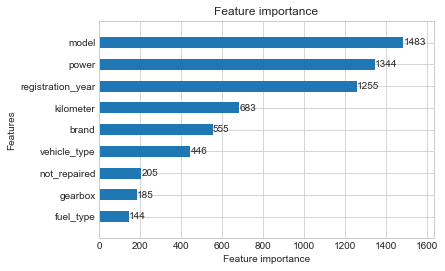

In [85]:
# plotting feature importance
lgb.plot_importance(gbm_model, height=.5) 

## Анализ моделей

Соберём результаты в таблицу.

In [86]:
Results = pd.DataFrame(
    {'RMSE_score': scores,
    'prediction_time': prediction_time,
    'training_time': training_time},
    index = models
)

Посчитаем общее время работы модели и посмотрим на победителей

In [87]:
Results['total_time'] = Results['prediction_time'] + Results['training_time']
Results.sort_values(by='RMSE_score')

,RMSE_score,prediction_time,training_time,total_time
CatBoostRegressor,"1,542.5381",0.1850,134.2024,134.3874
LGBMRegressor,"1,558.2957",0.1040,0.8622,0.9662
RandomForestRegressor,"1,741.3924",0.6481,285.6093,286.2574
SGDRegressor + CountVectorizer,"2,045.6546",0.0060,3.6848,3.6908
LinearRegression + CountVectorizer,"2,094.2623",0.0010,5.2872,5.2882
LinearRegression,"2,364.7733",0.0890,8.1449,8.2339
SGDRegressor,"2,366.4453",0.0998,12.4398,12.5396
ElasticNet,"2,674.0388",0.0670,3.0317,3.0987
ElasticNet + CountVectorizer,"3,529.0919",0.0020,89.9801,89.9821


В нашем случае лидером по значению RMSE является CatBoostRegressor. Но по времени работы модели лидирует LGBMRegressor, где CatBoostRegressor значительно отстаёт.

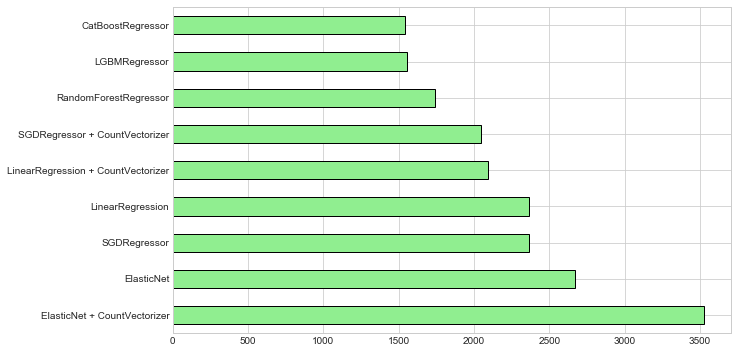

In [88]:
Results.sort_values(by='RMSE_score', ascending=False)['RMSE_score'].plot(
    kind='barh', 
    figsize=(10,6), 
    color='lightgreen', 
    ec='black');

## Общий вывод

Мы произвели подготовку данных и выявили аномальные значения цены, года регистрации и мощности автомобиля, а так же были пропущенные значения в следующих столбцах:   

`NotRepaired` - 20.1%   
`VehicleType` - 10.6%   
`FuelType` - 9.3%   
`Gearbox` - 5.6%   
`Model` - 5.6%

Пропущеные значения в основном были заменены заглушкой `no_info`, аномалии частично были убраны, так как не ясна их природа.

Было обучено и проверено 6 моделей, их значения RMSE и времени работы сохранены в `Results`.    

Самые лучшие результаты в нашем случае показала модель **LGBMRegressor** с RMSE 1,558 и временем работы 0.9662 сек.

Но значение RMSE незначительно лучше у CatBoostRegressor 1,542, но значительно хуже по времени - 134.3874 сек.

Второе место по времени работы занимает модель ElasticNet 3.0987 сек, но она же занимает и одно из последних мест по значению RMSE - 2,674.